In [9]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import warnings as w
w.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [11]:
#reading and backing up the data
addata=pd.read_csv(r"C:\Users\Maha\Downloads\Advertising.csv",header=0)
addata_bk=addata.copy()
addata.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
87,88,110.7,40.6,63.2,16.0
15,16,195.4,47.7,52.9,22.4
120,121,141.3,26.8,46.2,15.5
180,181,156.6,2.6,8.3,10.5
45,46,175.1,22.5,31.5,14.9
108,109,13.1,0.4,25.6,5.3
37,38,74.7,49.4,45.7,14.7
10,11,66.1,5.8,24.2,8.6
43,44,206.9,8.4,26.4,12.9
19,20,147.3,23.9,19.1,14.6


In [12]:
#information of the dataset
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
#check if there are any duplicates
addata_d=addata[addata.duplicated(keep='last')]
addata_d

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [14]:
#check if there are any null values
addata.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [15]:
#renaming the column name
addata2= addata.rename({'Unnamed: 0':'Unnamed'}, axis=1)
addata2

,Unnamed,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [16]:
#deleting the column that influences the dependent variable least
del addata2['Unnamed']

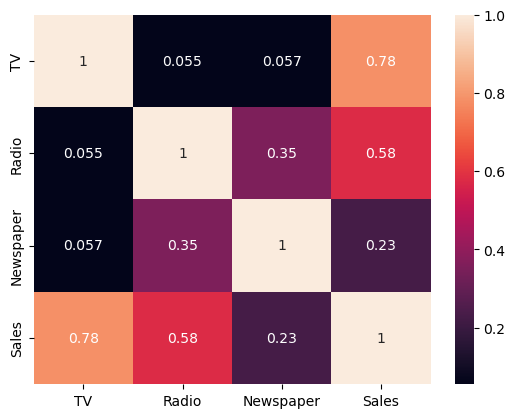

In [17]:
#heatmap for the representing the correlation between variables
correlation = addata2.corr()
s.heatmap(correlation, annot=True)
# Show the plots
plt.show()

In [33]:
addata2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
#checking the number of unique values in each column
addata2.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [35]:
#Box plot  IQR=Q3-Q1
First_quantile=addata2.quantile(.25)
Third_quantile=addata2.quantile(.75)
IQR=Third_quantile-First_quantile
print(IQR)

TV           144.450
Radio         26.550
Newspaper     32.350
Sales          7.025
dtype: float64


In [36]:
#no. of rows and columns in given dataset
addata2.shape

(200, 4)

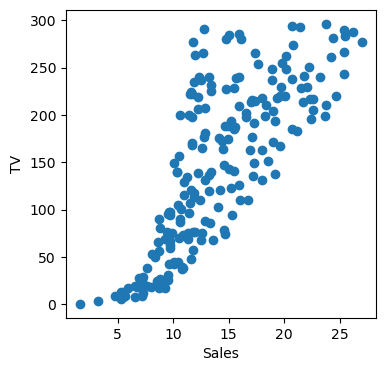

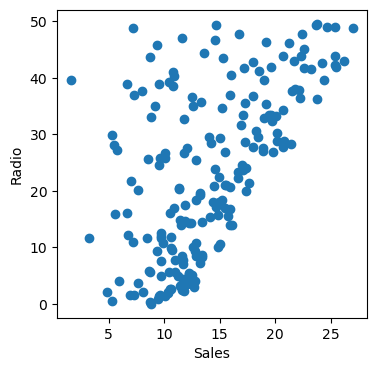

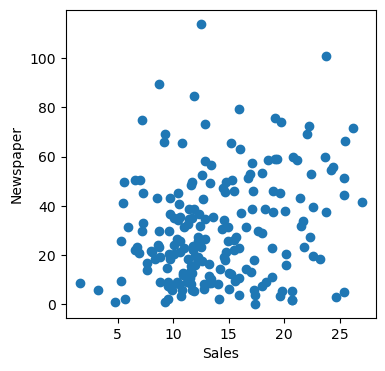

In [50]:
#scatterplot
for col in addata2.columns:
    if col!='Sales':
        fig, ax = plt.subplots(figsize=(4,4))
        ax.scatter(x = addata2['Sales'], y = addata2[col])
        plt.xlabel("Sales")
        plt.ylabel(col)
        plt.show()

In [37]:
#identifying the independent and dependent variables
indepvar=[]
for col in addata2.columns:
    if col!='Sales':
        indepvar.append(col)
tarvar='Sales'
x=addata2[indepvar]
y=addata2[tarvar]

In [101]:
#splitting the data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [111]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
x_train=scal.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=scal.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

# LinearRegression

In [112]:
#train the algorithm and build the model with train dataset
from sklearn.linear_model import LinearRegression
#create an object for regression model
model=LinearRegression()
#train the model with training dataset
model.fit(x_train,y_train)
#predict the model with test dataset
y_pred=model.predict(x_test)


In [113]:
#evaluation metrics for  the regression model
from sklearn import metrics
print("mean absolute error:",round(metrics.mean_absolute_error(y_test,y_pred),3))
print("mean squared error:",round(metrics.mean_squared_error(y_test,y_pred),3))
print("root mean squared error:",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print("R2 score:",round(metrics.r2_score(y_test,y_pred),3))
print("mean absolute percentage error:",round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print("root mean square log error:",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

mean absolute error: 1.547
mean squared error: 3.796
root mean squared error: 1.948
R2 score: 0.861
mean absolute percentage error: 16.592 %
root mean square log error: 0.667


In [114]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.85885


In [115]:
# Display the Final results 

Results = pd.DataFrame({'Sales_A':y_test, 'Sales_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = addata_bk.merge(Results, left_index=True, right_index=True) #both indices should be equal

ResultsFinal['%Error']=round(((ResultsFinal['Sales_A']-ResultsFinal['Sales_P'])))

# Display 10 records randomly

ResultsFinal.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales_A,Sales_P,%Error
177,178,170.2,7.8,35.2,11.7,11.7,11.843614,-0.0
96,97,197.6,3.5,5.9,11.7,11.7,12.031333,-0.0
137,138,273.7,28.9,59.7,20.8,20.8,20.975285,-0.0
24,25,62.3,12.6,18.3,9.7,9.7,7.826830,2.0
158,159,11.7,36.9,45.2,7.3,7.3,10.640850,-3.0
